In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import nest

plt.rcParams['figure.figsize'] = (16, 8)


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.3
 Built: May  5 2022 07:35:59

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



### Task 1.1

In [2]:
!python3 brunel_delta_nest.py


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.3
 Built: May  5 2022 07:35:59

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.


Nov 09 09:40:33 SimulationManager::set_status [Info]: 
    Temporal resolution changed from 0.1 to 0.1 ms.
Building network
Connecting devices
Connecting network
Excitatory connections
Inhibitory connections
Simulating

Nov 09 09:40:34 NodeManager::prepare_nodes [Info]: 
    Preparing 12503 nodes for simulation.

Nov 09 09:40:35 SimulationManager::run [Warning]: 
    The requested simulation time is not an integer multiple of the minimal 
    delay in the network. This may result in inconsistent results under the 
    following conditions: (i) A network contains more than one source of 
    randomness, e.g., two different poisson_generators, and (ii) Simulate is 

### Task 1.2
See file brunel_delta.py

In [3]:
%load_ext autoreload
%autoreload 2
from brunel_delta import sim_brunel_delta
esp, isp = sim_brunel_delta()

Building network
Connecting devices
Connecting network
Excitatory connections
Inhibitory connections
Simulating
Brunel network simulation (Python)
Number of neurons : 12500
Number of synapses: 15637600
       Exitatory  : 12512500
       Inhibitory : 3125000
Excitatory rate   : 32.10 Hz
Inhibitory rate   : 32.32 Hz
Building time     : 1.60 s
Simulation time   : 15.74 s

Nov 09 09:40:53 SimulationManager::run [Warning]: 
    The requested simulation time is not an integer multiple of the minimal 
    delay in the network. This may result in inconsistent results under the 
    following conditions: (i) A network contains more than one source of 
    randomness, e.g., two different poisson_generators, and (ii) Simulate is 
    called repeatedly with simulation times that are not multiples of the 
    minimal delay.

[ 100% ] Model time: 999.0 ms, Real-time factor: 14.9555eal-time factor: 14.9197


In [4]:
esp.describe()

,senders,times
count,1605.000000,1605.000000
mean,25.555763,501.056324
std,14.425582,288.703679
min,1.000000,13.200000
25%,13.000000,249.000000
50%,26.000000,501.800000
75%,38.000000,753.400000
max,50.000000,999.900000


In [5]:
esp.sort_values(by='times')

,senders,times
0,10,13.2
1,29,13.3
7,11,13.6
3,2,13.7
22,43,13.7
...,...,...
1600,40,996.4
1598,18,997.0
1603,38,998.4
1602,27,998.6


([], [])

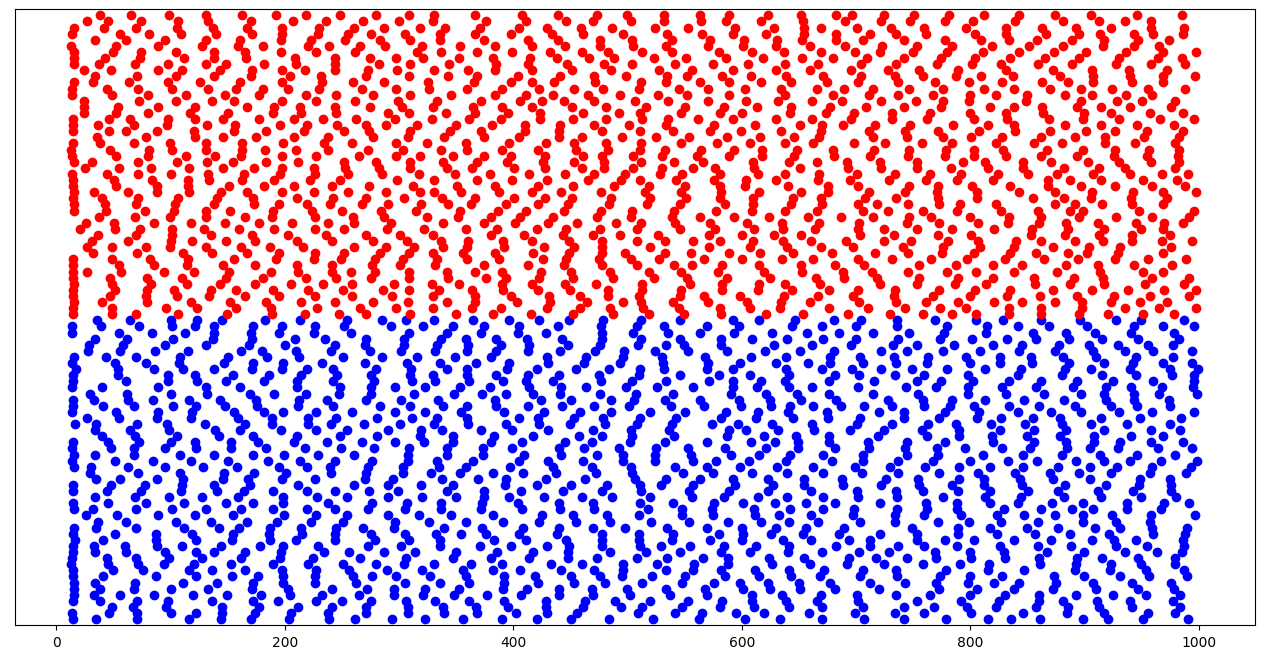

In [6]:
plt.plot(esp.times, esp.senders, 'bo')
plt.plot(isp.times, isp.senders-10000+50, 'ro')
plt.ylim(0, 101)
plt.yticks([])

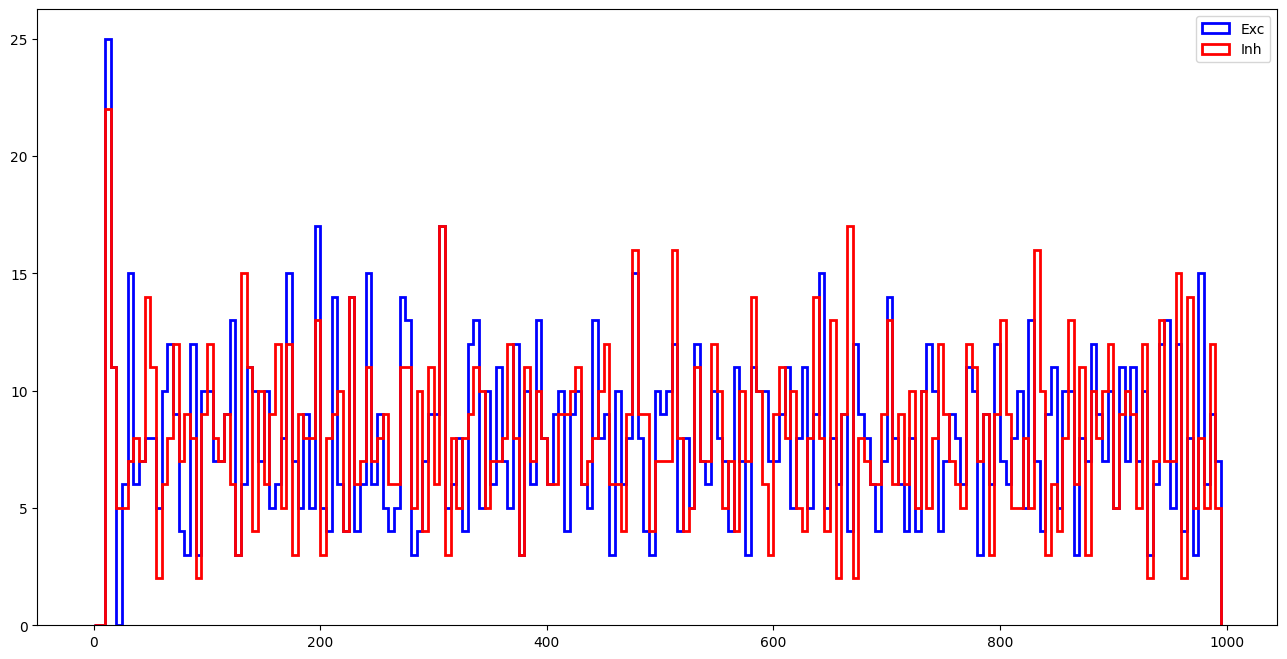

In [7]:
bins = np.arange(0, 1000, 5.)
plt.hist(esp.times, bins=bins, histtype='step', color='b', lw=2, label='Exc')
plt.hist(isp.times, bins=bins, histtype='step', color='r', lw=2, label='Inh')
plt.legend()

### Task 1.3

In [8]:
esp, isp = sim_brunel_delta(simtime=250, num_vp=1)

Building network
Connecting devices
Connecting network
Excitatory connections
Inhibitory connections
Simulating
Brunel network simulation (Python)
Number of neurons : 12500
Number of synapses: 15637600
       Exitatory  : 12512500
       Inhibitory : 3125000
Excitatory rate   : 32.24 Hz
Inhibitory rate   : 32.16 Hz
Building time     : 1.45 s
Simulation time   : 4.58 s

Nov 09 09:41:11 SimulationManager::run [Warning]: 
    The requested simulation time is not an integer multiple of the minimal 
    delay in the network. This may result in inconsistent results under the 
    following conditions: (i) A network contains more than one source of 
    randomness, e.g., two different poisson_generators, and (ii) Simulate is 
    called repeatedly with simulation times that are not multiples of the 
    minimal delay.

[ 100% ] Model time: 249.0 ms, Real-time factor: 15.1679


In [9]:
esp, isp = sim_brunel_delta(simtime=250, num_vp=8)

Building network
Connecting devices
Connecting network
Excitatory connections
Inhibitory connections
Simulating

Brunel network simulation (Python)
Number of neurons : 12500
Number of synapses: 15637600
       Exitatory  : 12512500
       Inhibitory : 3125000
Excitatory rate   : 31.28 Hz
Inhibitory rate   : 32.00 Hz
Building time     : 0.36 s
Simulation time   : 1.04 s
Nov 09 09:41:15 SimulationManager::run [Warning]: 
    The requested simulation time is not an integer multiple of the minimal 
    delay in the network. This may result in inconsistent results under the 
    following conditions: (i) A network contains more than one source of 
    randomness, e.g., two different poisson_generators, and (ii) Simulate is 
    called repeatedly with simulation times that are not multiples of the 
    minimal delay.

[ 100% ] Model time: 249.0 ms, Real-time factor: 2.3298


Increasing the number of processes substantially decreases "Building time" and "Simulation time".

### Task 2

In [10]:
def plot_task2(esp, isp):
    e_gid_min = esp.senders.min()
    i_gid_min = isp.senders.min()
    
    e_hist = (800 <= esp.times) & (esp.times <= 1000)
    i_hist = (800 <= isp.times) & (isp.times <= 1000)
    
    e_plot = e_hist & (esp.senders < (e_gid_min + 40))
    i_plot = i_hist & (isp.senders < (i_gid_min + 10))
    
    plt.subplot(211)
    plt.plot(esp.times[e_plot], esp.senders[e_plot] - e_gid_min + 1, 'bo')
    plt.plot(isp.times[i_plot], isp.senders[i_plot] - i_gid_min + 41, 'ro')
    plt.ylim(0, 51)
    plt.yticks([])
    
    plt.subplot(212)
    bins = np.arange(800., 1000., 0.1)
    plt.hist(esp.times[e_hist].values, bins=bins, histtype='step', color='b', lw=2, label='Exc')
    plt.hist(isp.times[i_hist].values, bins=bins, histtype='step', color='r', lw=2, label='Inh')
    plt.legend()


### Case A: (g=3, eta=2)

Building network
Connecting devices
Connecting network
Excitatory connections
Inhibitory connections
Simulating

Nov 09 09:41:17 SimulationManager::run [Warning]: 
    The requested simulation time is not an integer multiple of the minimal 
    delay in the network. This may result in inconsistent results under the 
    following conditions: (i) A network contains more than one source of 
    randomness, e.g., two different poisson_generators, and (ii) Simulate is 
    called repeatedly with simulation times that are not multiples of the 
    minimal delay.

[   0% ] Model time: 0.0 ms, Real-time factor: 0.0000Brunel network simulation (Python)
Number of neurons : 12500
Number of synapses: 15639500
       Exitatory  : 12512500
       Inhibitory : 3125000
Excitatory rate   : 189.71 Hz
Inhibitory rate   : 189.73 Hz
Building time     : 0.27 s
Simulation time   : 9.08 s
[ 100% ] Model time: 999.0 ms, Real-time factor: 8.5892ime: 28.5 ms, Real-time factor: 5.4975


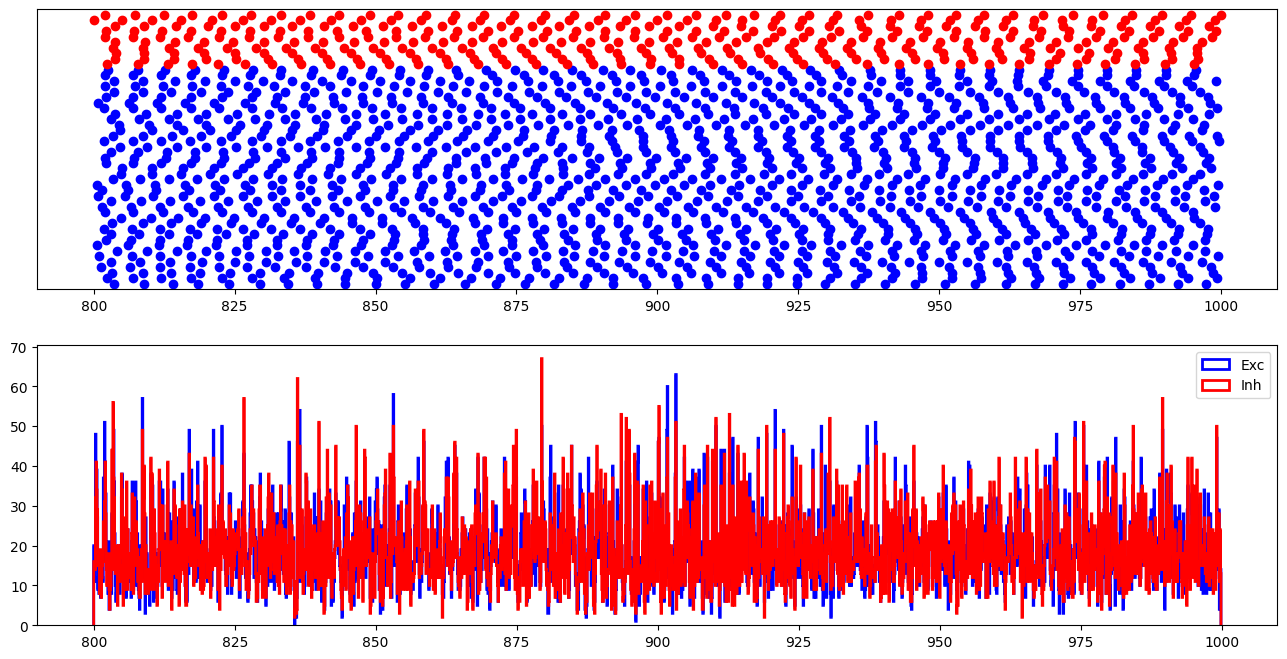

In [11]:
esp, isp = sim_brunel_delta(order=2500, N_rec=1000, g=3., eta=2., num_vp=8)
plot_task2(esp, isp)

### Case B: (g=6, eta=4)

Building network
Connecting devices
Connecting network
Excitatory connections
Inhibitory connections
Simulating

Nov 09 09:41:27 SimulationManager::run [Warning]: 
Brunel network simulation (Python)
Number of neurons : 12500
Number of synapses: 15639500
       Exitatory  : 12512500
       Inhibitory : 3125000
Excitatory rate   : 50.08 Hz
Inhibitory rate   : 50.15 Hz
Building time     : 0.33 s
Simulation time   : 5.99 s
    The requested simulation time is not an integer multiple of the minimal 
    delay in the network. This may result in inconsistent results under the 
    following conditions: (i) A network contains more than one source of 
    randomness, e.g., two different poisson_generators, and (ii) Simulate is 
    called repeatedly with simulation times that are not multiples of the 
    minimal delay.

[ 100% ] Model time: 999.0 ms, Real-time factor: 5.3179


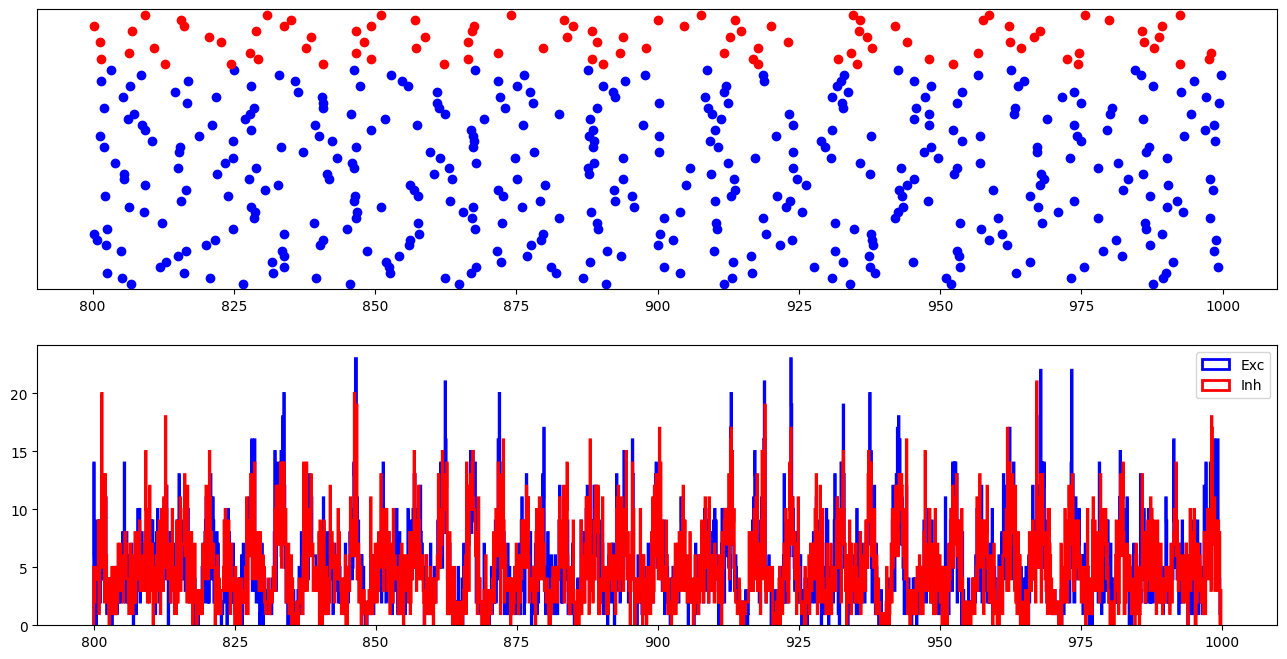

In [12]:
esp, isp = sim_brunel_delta(order=2500, N_rec=1000, g=6., eta=4., num_vp=8)
plot_task2(esp, isp)

### Case C: (g=5, eta=2)

Building network
Connecting devices
Connecting network
Excitatory connections
Inhibitory connections
Simulating

Nov 09 09:41:33 SimulationManager::run [Warning]: 
    The requested simulation time is not an integer multiple of the minimal 
    delay in the network. This may result in inconsistent results under the 
    following conditions: (i) A network contains more than one source of 
    randomness, e.g., two different poisson_generators, and (ii) Simulate is 
    called repeatedly with simulation times that are not multiples of the 
    minimal delay.

[   5% ] Model time: 45.0 ms, ReBrunel network simulation (Python)
Number of neurons : 12500
Number of synapses: 15639500
       Exitatory  : 12512500
       Inhibitory : 3125000
Excitatory rate   : 31.92 Hz
Inhibitory rate   : 32.05 Hz
Building time     : 0.33 s
Simulation time   : 4.12 s
[ 100% ] Model time: 999.0 ms, Real-time factor: 3.4610


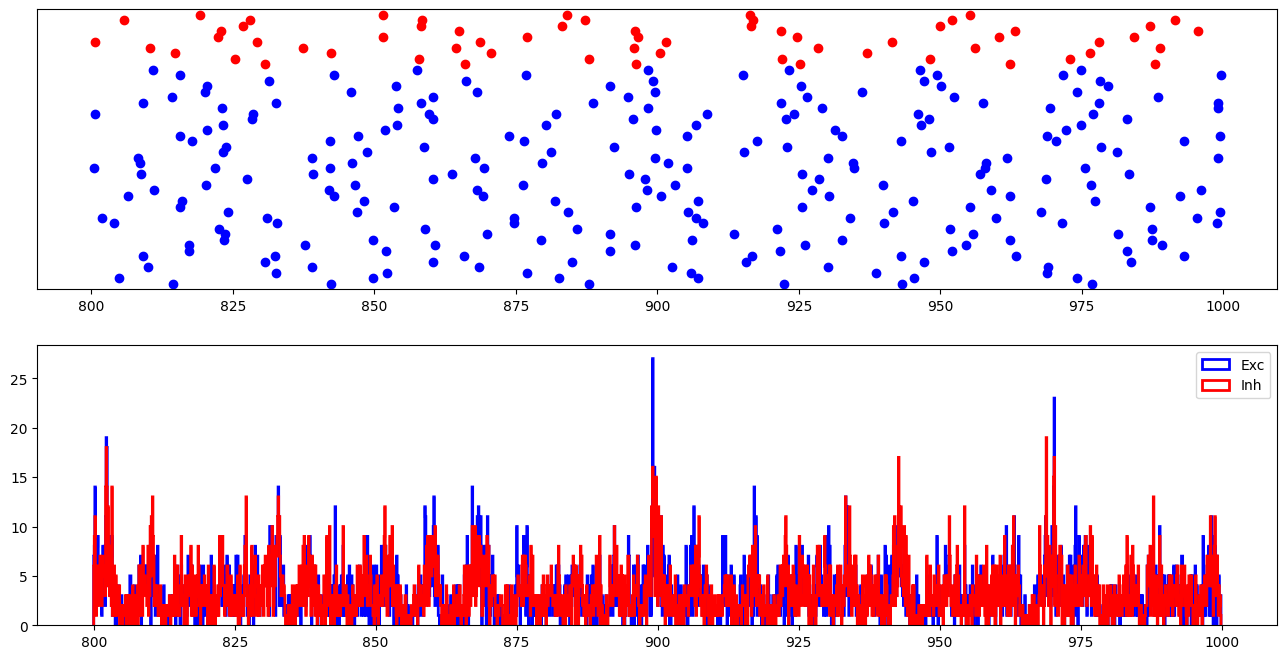

In [13]:
esp, isp = sim_brunel_delta(order=2500, N_rec=1000, g=5., eta=2., num_vp=8)
plot_task2(esp, isp)

### Case D: (g=4.5, eta=0.9)

Building network
Connecting devices
Connecting network
Excitatory connections
Inhibitory connections
Simulating

Nov 09 09:41:38 SimulationManager::run [Warning]: 
    The requested simulation time is not an integer multiple of the minimal 
Brunel network simulation (Python)
Number of neurons : 12500
Number of synapses: 15639500
       Exitatory  : 12512500
       Inhibitory : 3125000
Excitatory rate   : 4.97 Hz
Inhibitory rate   : 5.04 Hz
Building time     : 0.38 s
Simulation time   : 2.15 s
    delay in the network. This may result in inconsistent results under the 
    following conditions: (i) A network contains more than one source of 
    randomness, e.g., two different poisson_generators, and (ii) Simulate is 
    called repeatedly with simulation times that are not multiples of the 
    minimal delay.

[ 100% ] Model time: 999.0 ms, Real-time factor: 1.5214


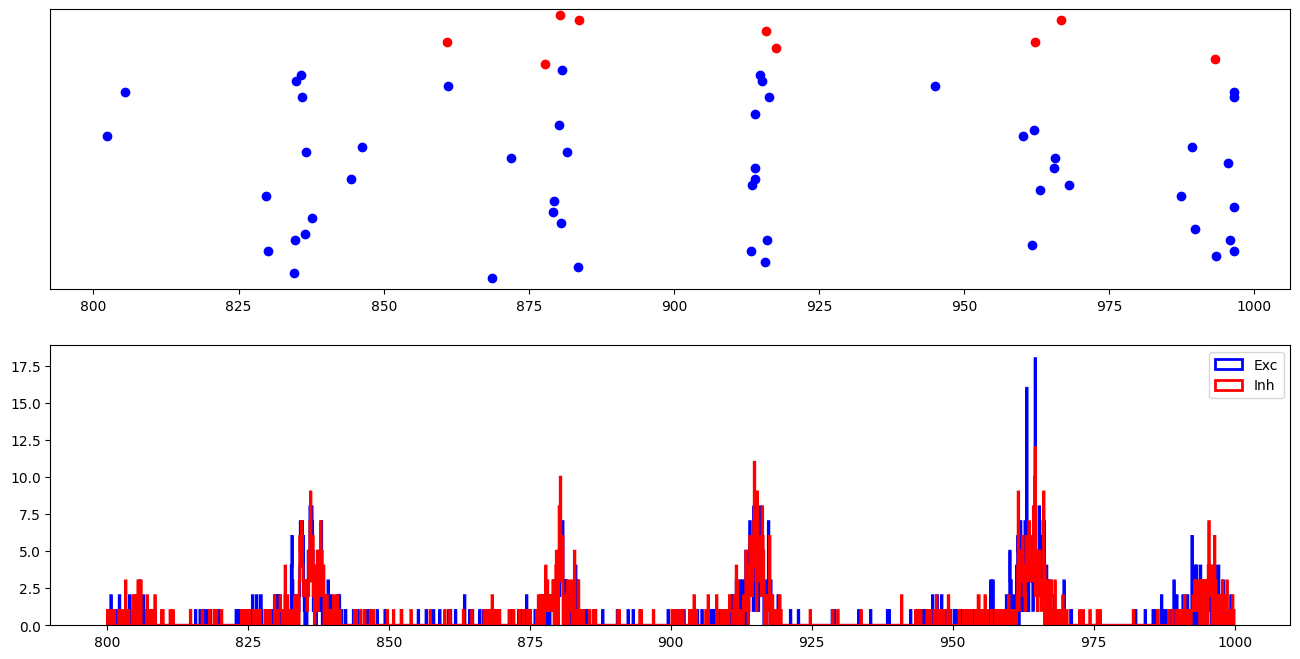

In [14]:
esp, isp = sim_brunel_delta(order=2500, N_rec=1000, g=4.5, eta=0.9, num_vp=8)
plot_task2(esp, isp)

In case A the results in Brunel's paper Figure 8 was more regular. This can be explained by the different reset potential: In Brunel, it was reset to 10 mV above resting potential.

This can be now be changed by giving the argument V_reset=10.

### Task 3

In [15]:
def plot_task3(esp, isp):
    e_gid_min = esp.senders.min()
    i_gid_min = isp.senders.min()
    
    e_hist = (0 <= esp.times) & (esp.times <= 1000)
    i_hist = (0 <= isp.times) & (isp.times <= 1000)
    e_plot = e_hist & (esp.senders < (e_gid_min + 40))
    i_plot = i_hist & (isp.senders < (i_gid_min + 10))
    
    plt.subplot(211)
    plt.plot(esp.times[e_plot], esp.senders[e_plot] - e_gid_min + 1, 'bo')
    plt.plot(isp.times[i_plot], isp.senders[i_plot] - i_gid_min + 41, 'ro')
    plt.ylim(0, 51)
    plt.yticks([])
    plt.xlim(0, 1000)
    
    plt.subplot(212)
    bins = np.arange(0., 1000., 2.0)
    plt.hist(esp.times[e_hist].values, bins=bins, histtype='step', color='b', lw=2, label='Exc')
    plt.hist(isp.times[i_hist].values, bins=bins, histtype='step', color='r', lw=2, label='Inh')
    plt.legend()
    

### Task 3.1

Building network
Connecting devices
Connecting network
Excitatory connections
Inhibitory connections
Simulating
Brunel network simulation (Python)
Number of neurons : 12500
Number of synapses: 15639500
       Exitatory  : 12512500
       Inhibitory : 3125000
Excitatory rate   : 14.96 Hz
Inhibitory rate   : 14.97 Hz
Building time     : 1.58 s
Simulation time   : 8.72 s

Nov 09 09:41:42 SimulationManager::run [Warning]: 
    The requested simulation time is not an integer multiple of the minimal 
    delay in the network. This may result in inconsistent results under the 
    following conditions: (i) A network contains more than one source of 
    randomness, e.g., two different poisson_generators, and (ii) Simulate is 
    called repeatedly with simulation times that are not multiples of the 
    minimal delay.

[ 100% ] Model time: 999.0 ms, Real-time factor: 7.91729


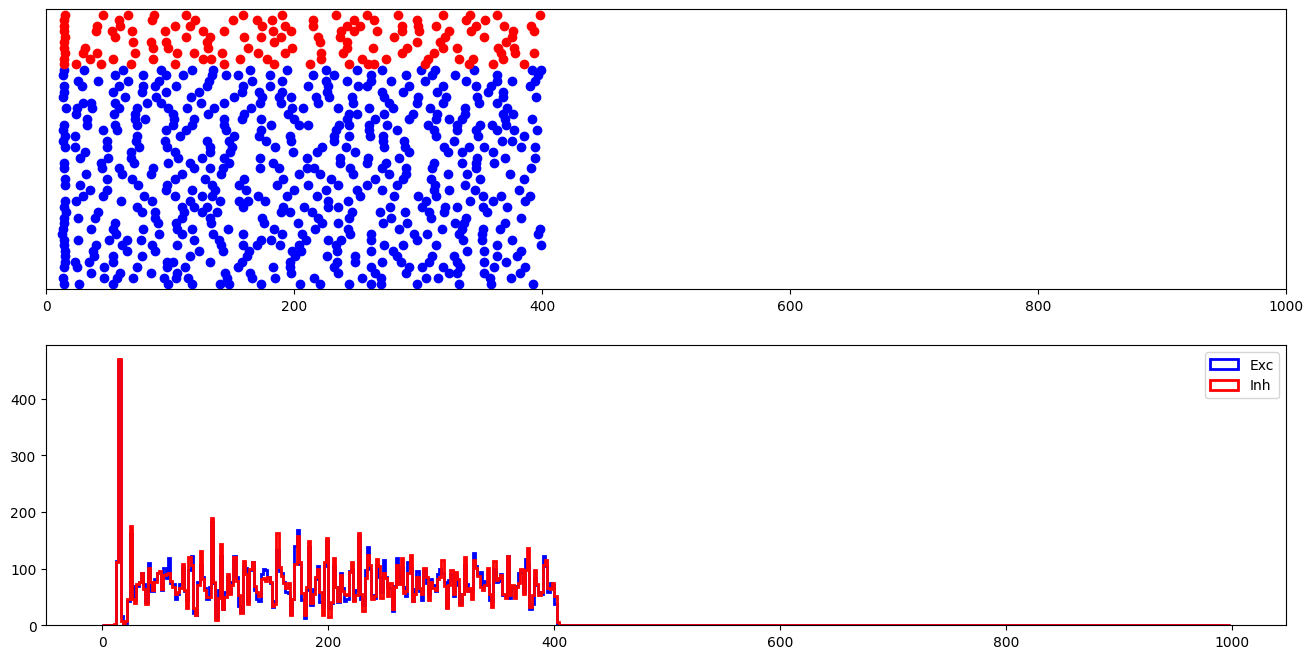

In [16]:
esp, isp = sim_brunel_delta(order=2500, N_rec=1000, g=5., eta=2., V_reset=10., input_stop=400.,)
plot_task3(esp, isp)

Building network
Connecting devices
Connecting network
Excitatory connections
Inhibitory connections
Simulating

Nov 09 09:41:53 SimulationManager::run [Warning]: 
    The requested simulation time is not an integer multiple of the minimal 
    delay in the network. This may result in inconsistent results under the 
    following conditions: (i) A network contains more than one source of 
    randomness, e.g., two different poisson_generators, and (ii) Simulate is 
    called repeatedly with simulation times that are not multiples of the 
    minimal delay.

[  35% ] Model time: 345Brunel network simulation (Python)
Number of neurons : 12500
Number of synapses: 15639500
       Exitatory  : 12512500
       Inhibitory : 3125000
Excitatory rate   : 11.98 Hz
Inhibitory rate   : 12.03 Hz
Building time     : 1.51 s
Simulation time   : 6.58 s
[ 100% ] Model time: 999.0 ms, Real-time factor: 5.75564


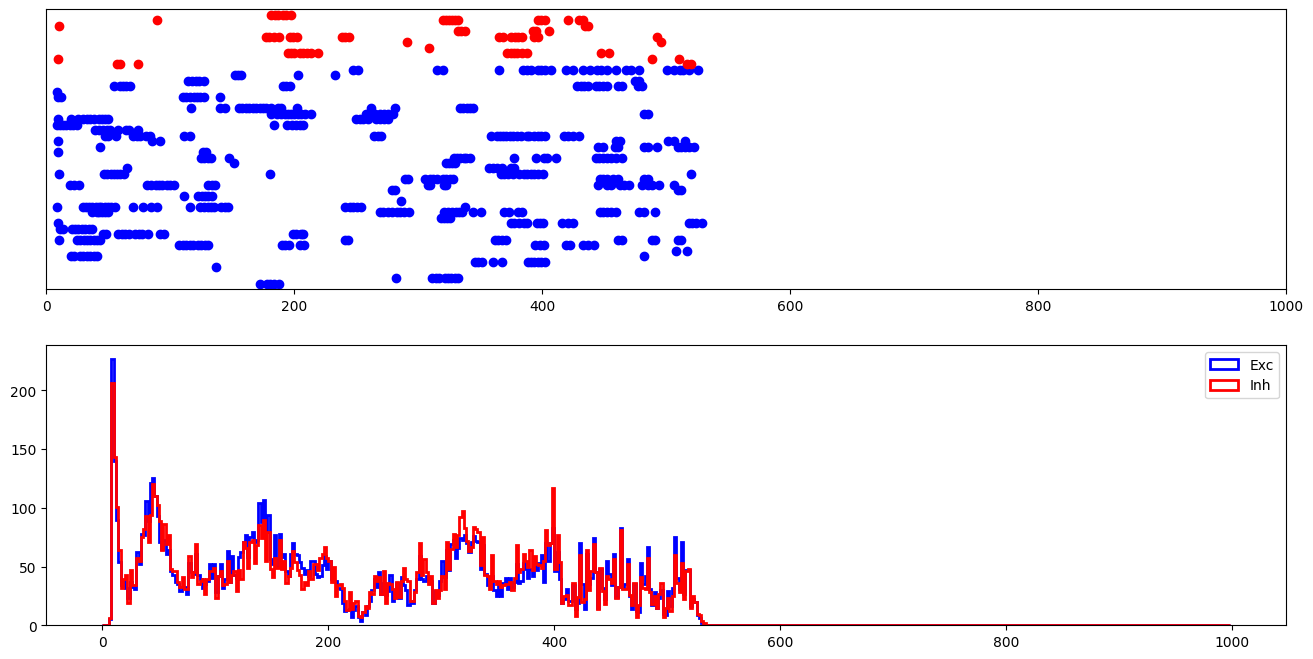

In [17]:
esp, isp = sim_brunel_delta(order=2500, N_rec=1000, g=5., eta=2., J=1.0, V_reset=10., input_stop=400., seed=152)
plot_task3(esp, isp)

The spikes now come in clusters, because the synaptic input is strong enough to keep driving the neurons, also after the refractory period. In some cases (for some random seeds), the activity can also go on for a certain time after the input has been turned off.

The volley at the start is caused by all neurons starting at the same resting potential, and could be removed by initializing the neurons at random initial potentials. This can be done by adding:
"V_m": nest.random.uniform(-theta, theta)
to the 'neuron_params'

### Task 4

In [18]:
def plot_task4(esp, isp):
    e_gid_min = esp.senders.min()
    i_gid_min = isp.senders.min()
    
    e_hist = (500 <= esp.times) & (esp.times <= 1000)
    i_hist = (500 <= isp.times) & (isp.times <= 1000)
    e_plot = e_hist & (esp.senders < (e_gid_min + 40))
    i_plot = i_hist & (isp.senders < (i_gid_min + 10))
    
    plt.subplot(211)
    plt.plot(esp.times[e_plot], esp.senders[e_plot] - e_gid_min + 1, 'bo')
    plt.plot(isp.times[i_plot], isp.senders[i_plot] - i_gid_min + 41, 'ro')
    plt.ylim(0, 51)
    plt.yticks([])
    plt.xlim(500, 1000)
    
    plt.subplot(212)
    bins = np.arange(500., 1000., 2.0)
    plt.hist(esp.times[e_hist].values, bins=bins, histtype='step', color='b', lw=2, label='Exc')
    plt.hist(isp.times[i_hist].values, bins=bins, histtype='step', color='r', lw=2, label='Inh')
    plt.legend()

First simulate reference case:

Building network
Connecting devices
Connecting network
Excitatory connections
Inhibitory connections
Simulating

Nov 09 09:42:01 SimulationManager::run [Warning]: 
    The requested simulation time is not an integer multiple of the minimal 
    delay in the network. This may result in inconsistent results under the 
    following conditions: (i) A network contains more than one source of 
    randomness, e.g., two different poisson_generators, and (ii) Simulate is 
    called repeatedly with simulation times that are not multiples of the 
    minimal delay.

[  51% ] Model time: 502.5 ms, Real-time fBrunel network simulation (Python)
Number of neurons : 12500
Number of synapses: 15638000
       Exitatory  : 12512500
       Inhibitory : 3125000
Excitatory rate   : 37.46 Hz
Inhibitory rate   : 37.79 Hz
Building time     : 1.46 s
Simulation time   : 17.85 s
[ 100% ] Model time: 999.0 ms, Real-time factor: 17.0689


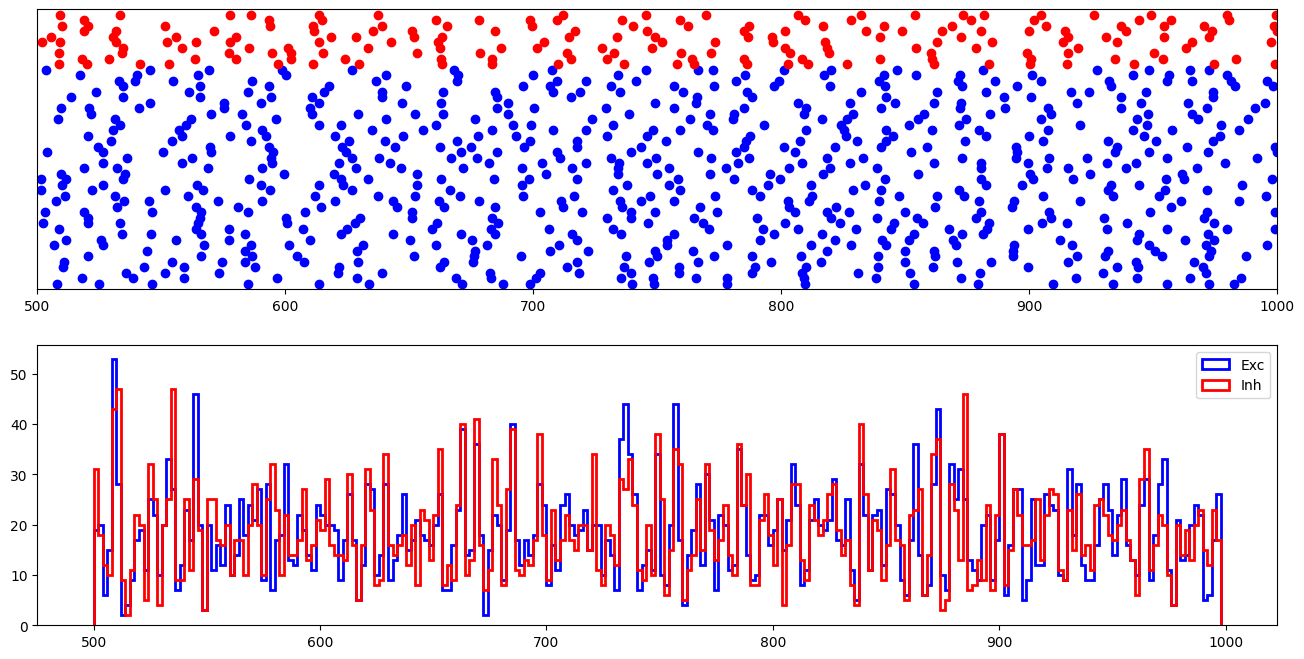

In [19]:
esp, isp = sim_brunel_delta(order=2500, N_rec=250, g=5., eta=2., J=0.1, V_reset=10., seed=152)
plot_task4(esp, isp)

Then simulate reduced network:

Building network
Connecting devices
Connecting network
Excitatory connections
Inhibitory connections
Simulating
Brunel network simulation (Python)
Number of neurons : 1250
Number of synapses: 158000
       Exitatory  : 126250
       Inhibitory : 31250
Excitatory rate   : 84.69 Hz
Inhibitory rate   : 84.88 Hz
Building time     : 0.02 s
Simulation time   : 0.90 s

Nov 09 09:42:18 SimulationManager::run [Warning]: 
    The requested simulation time is not an integer multiple of the minimal 
    delay in the network. This may result in inconsistent results under the 
    following conditions: (i) A network contains more than one source of 
    randomness, e.g., two different poisson_generators, and (ii) Simulate is 
    called repeatedly with simulation times that are not multiples of the 
    minimal delay.

[ 100% ] Model time: 999.0 ms, Real-time factor: 0.8947


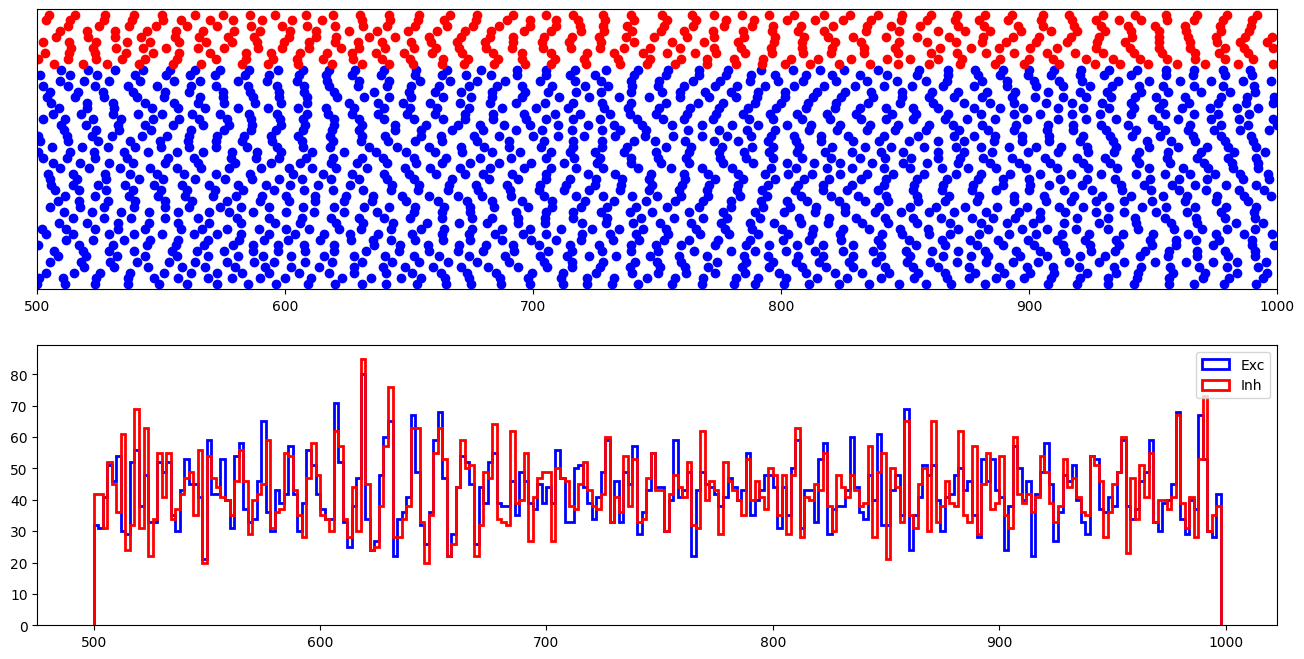

In [20]:
esp, isp = sim_brunel_delta(order=250, N_rec=250, g=5., eta=2., J=0.1, V_reset=10., seed=152)
plot_task4(esp, isp)

As we see, we get a far too high firing rate. But the neurons only receive 1/10 of the synaptic input. We can try to compensate:

Building network
Connecting devices
Connecting network
Excitatory connections
Inhibitory connections
Simulating
Brunel network simulation (Python)
Number of neurons : 1250
Number of synapses: 158000
       Exitatory  : 126250
       Inhibitory : 31250
Excitatory rate   : 35.81 Hz
Inhibitory rate   : 37.32 Hz
Building time     : 0.02 s
Simulation time   : 0.48 s

Nov 09 09:42:19 SimulationManager::run [Warning]: 
    The requested simulation time is not an integer multiple of the minimal 
    delay in the network. This may result in inconsistent results under the 
    following conditions: (i) A network contains more than one source of 
    randomness, e.g., two different poisson_generators, and (ii) Simulate is 
    called repeatedly with simulation times that are not multiples of the 
    minimal delay.

[ 100% ] Model time: 999.0 ms, Real-time factor: 0.4688


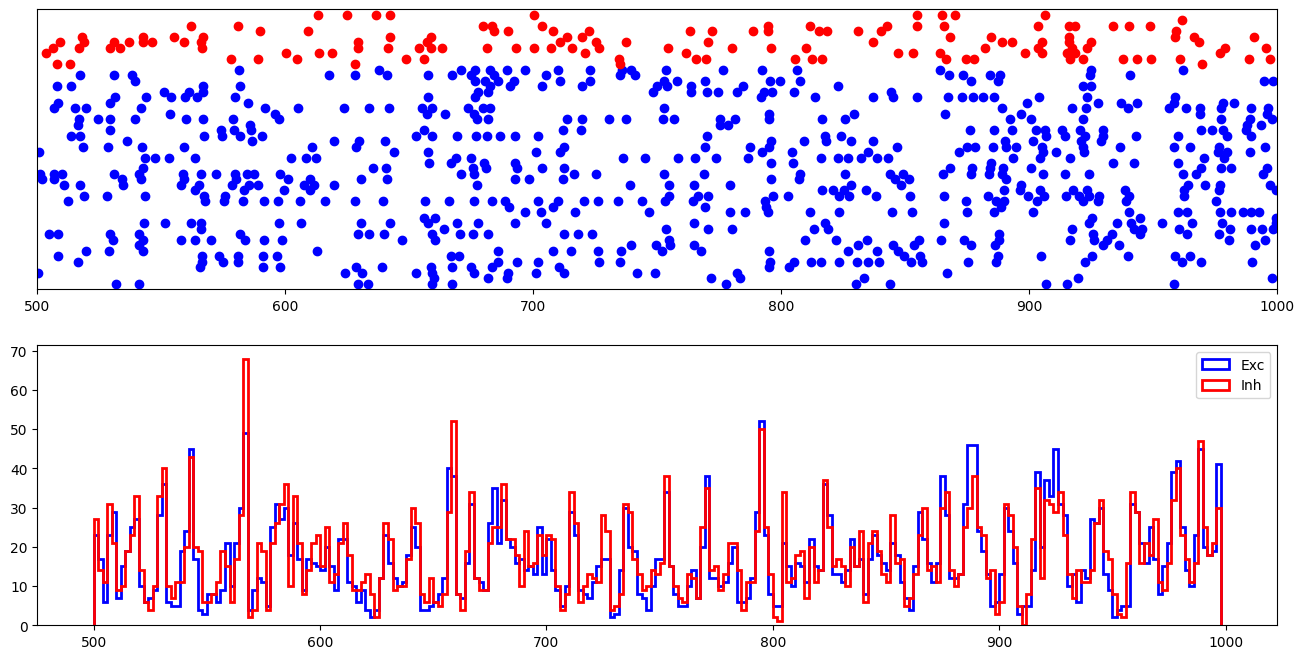

In [21]:
esp, isp = sim_brunel_delta(order=250, N_rec=250, g=5., eta=1.4, J=0.8, V_reset=10., seed=152)
plot_task4(esp, isp)

This is good enough for our purposes here :-) 